<a href="https://colab.research.google.com/github/DiyaShah2753/ML/blob/main/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
     Outlook Temperature Humidity   Wind Play
0      Rainy         Hot     High  False   No
1      Rainy         Hot     High   True   No
2   Overcast         Hot     High  False  Yes
3      Sunny        Mild     High  False  Yes
4      Sunny        Cool   Normal  False  Yes
5      Sunny        Cool   Normal   True   No
6   Overcast        Cool   Normal   True  Yes
7      Rainy        Mild     High  False   No
8      Rainy        Cool   Normal  False  Yes
9      Sunny        Mild   Normal  False  Yes
10     Rainy        Mild   Normal   True  Yes
11  Overcast        Mild     High   True  Yes
12  Overcast         Ho

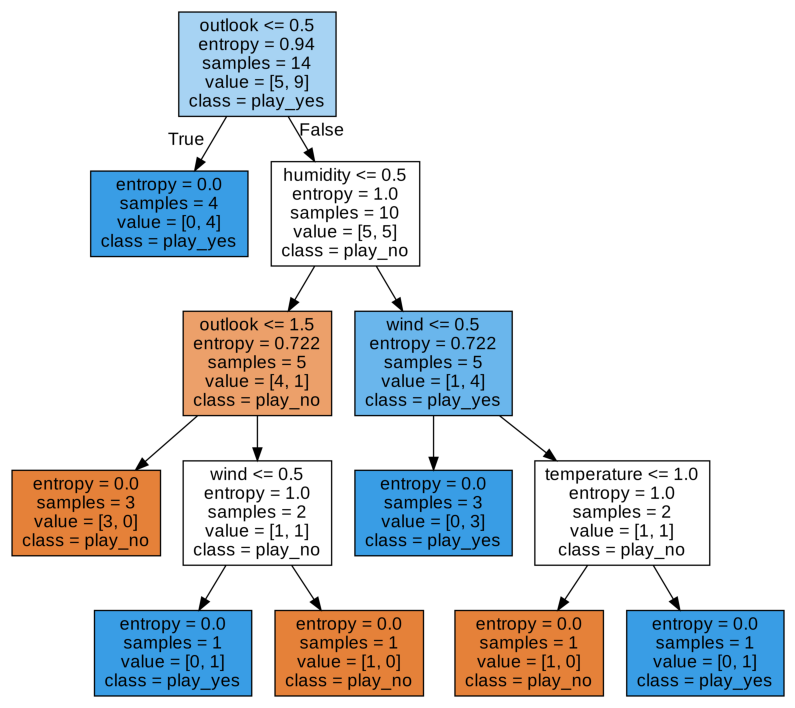

In [ ]:
import numpy as np
import math 
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 

Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
           'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool',
               'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

cl1 = pd.DataFrame({'Outlook':['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
           'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny'],
           'Temperature' : ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool',
               'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],'Humidity' : ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
              'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High'] , 
            'Wind' : ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True'] , 'Play' : ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
            'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']})

print(cl1)
'''
def calc_entropy(column) : 

  counts = np.bincount(column)
  probabilities = counts / len(column)

  entropy = 0
  for prob in probabilities:
    if prob > 0:
      entropy -= prob * math.log(prob,2)
  return entropy
print(calc_entropy(Play_encoded))

'''
clf = DecisionTreeClassifier(criterion = "entropy")
X_train =np.reshape(np.concatenate((Outlook_encoded, Temperature_encoded,Humidity_encoded,Wind_encoded)), (4, 14))
print(X_train,Play_encoded)

clf = clf.fit(X_train.transpose(),Play_encoded)
 
export_graphviz(clf,out_file='tree_entropy.dot',feature_names=['outlook','temperature','humidity','wind'], class_names=['play_no','play_yes'],filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();
# y_pred = clf.predict(X_train)




In [ ]:
import numpy as np
import math 
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 

Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
           'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool',
               'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

le = preprocessing.OneHotEncoder()
Outlook_encoded = le.fit_transform(np.array(Outlook).Transpose)
print(Outlook_encoded.(np.arry))


NameError: ignored